# Exercise 2 -- Group 53 -- Question 34

# Importing Libraries

In [1]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn as sk

plt.rcParams['mathtext.fontset'] = 'stix' # 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['figure.dpi'] = 150

# Data Cleaning

## Loading and display

First we load the data set by reading the `csv` file and store it in a `pandas.DataFrame` data structure. 

After loading we take a look at the current state of the data set via `df.info()` and `df.head()`. We see that we have `20343` data points, consisting both of numerical and string data.

In [2]:
# Load data set
df = pd.read_csv("data/bgg_dataset.csv", sep=";")

# Display current data set
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.2+ MB


None

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


## Clean string data

First let's work on the string data columns `Name`, `Mechanics` and `Domains`. While `Name` has no values missing, the other two are quite vacant with thousands of values missing. 

Therefore, it is not a good strategy to just drop all rows with missing values. Rather, we set the content of these rows to the string "Unknown", which permits us to use the other data.

In [3]:
# Print number of missing values for all columns
print(df.isna().sum())

# Set missing values to "Unknown"
df.loc[df['Mechanics'].isna(), "Mechanics"] = "Unknown"
df.loc[df['Domains'].isna(), "Domains"] = "Unknown"

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64


## Clean numerical data

Now we have to clean the numerical data.

As can be seen from above, the number of missing values for the numerical columns in neglectable. Therefore we drop all remaining rows with missing values.

The columns `ID` (unique board game ID, redundant to built-in `DataFrame` index variable) and `BGG Rank` (rank of board game, redundant to `Rating Average`) do not really contain any useful information for us. Therefore we can drop both columns.

The `Year Published` and `Owned Users` columns are stored in a `float64` format, which is not appropriate. We convert both of them to `int64`. 

The `Rating Average` and `Complexity Average` columns use the comma as the decimal point. This notation that is not usable for `Python`, therefore we replace all commas with dots. 

In [4]:
#: Drop all rows with missing numerical values
df.dropna(inplace=True)

# Drop ID column from the DataFrame
df.drop("ID", axis=1, inplace=True)
df.drop("BGG Rank", axis=1, inplace=True)

# Convert float columns to int
df["Year Published"] = df["Year Published"].astype(int)
df["Owned Users"] = df["Owned Users"].astype(int)

### Replace all negative years with zero (not used currently)
### df.loc[df["Year Published"] < 0, "Year Published"] = 0

# Replace commas with dots
df["Rating Average"] = df["Rating Average"].str.replace(",", ".").astype(float)
df["Complexity Average"] = df["Complexity Average"].str.replace(",", ".").astype(float)

The other columns are plotted for additional visual inspection. 

<font color='red'>TODO: Improving plots, add additional plots and more cleaning operations ???</font> 

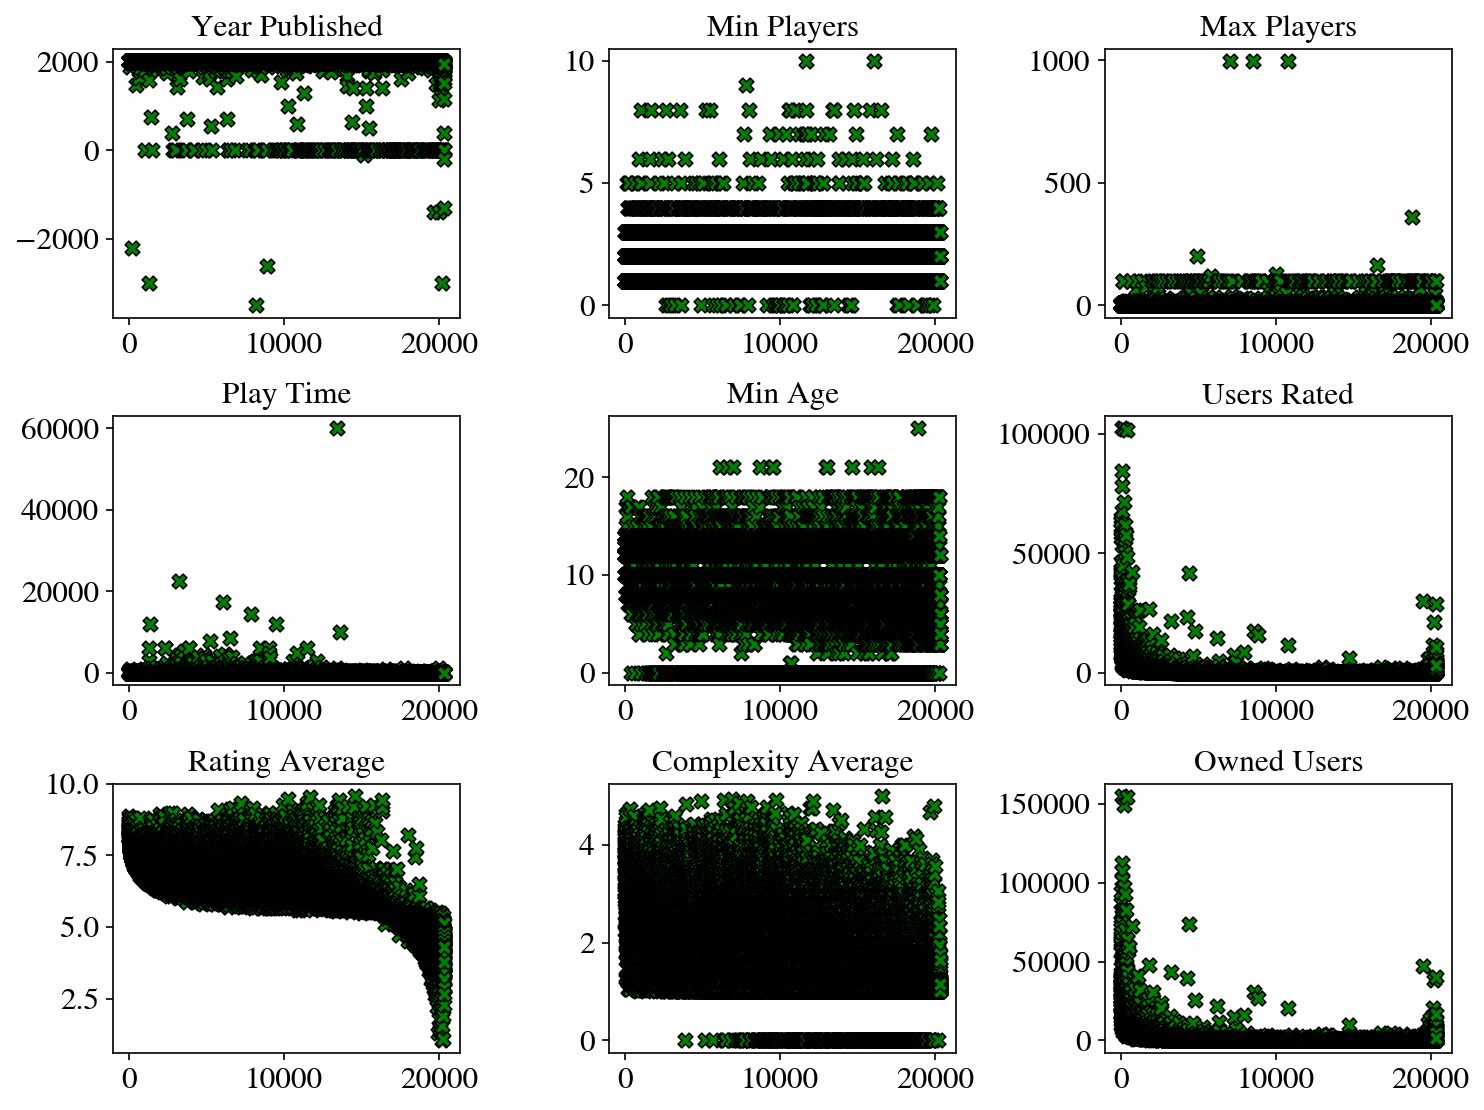

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 7.5))

columns = list(df.select_dtypes(include=['int64', 'float64']).columns)

for column, axis in zip(columns, axes.flatten()):
    axis.scatter(df.index, df[column].values, c="green", s=50, marker="X", edgecolors="black", linewidths=0.75)
    axis.set_title(column)

plt.tight_layout()
plt.show()

At last we display the now cleaned data set for comparison.

In [6]:
# Display cleaned data set
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 20320 entries, 0 to 20342
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                20320 non-null  object 
 1   Year Published      20320 non-null  int64  
 2   Min Players         20320 non-null  int64  
 3   Max Players         20320 non-null  int64  
 4   Play Time           20320 non-null  int64  
 5   Min Age             20320 non-null  int64  
 6   Users Rated         20320 non-null  int64  
 7   Rating Average      20320 non-null  float64
 8   Complexity Average  20320 non-null  float64
 9   Owned Users         20320 non-null  int64  
 10  Mechanics           20320 non-null  object 
 11  Domains             20320 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 2.0+ MB


None

,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,Complexity Average,Owned Users,Mechanics,Domains
0,Gloomhaven,2017,1,4,120,14,42055,8.79,3.86,68323,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2.84,65294,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3.91,28785,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,Terraforming Mars,2016,1,5,120,12,64864,8.43,3.24,87099,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,4.22,16831,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


# Model Selection

In [7]:
# TODO